<a href="https://colab.research.google.com/github/jinhuioh/hi_ai_himedia/blob/master/%5B%EC%B5%9C%EC%A2%85%5DML%EC%95%99%EC%83%81%EB%B8%94%EB%B9%84%EA%B5%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
#앙상블
from sklearn.ensemble import VotingClassifier

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier## tree방법론의 DecisionTreeClassifier사용
from sklearn.svm import SVC##svm방법론의 SVC사용
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.experimental import  enable_hist_gradient_boosting
from sklearn.ensemble import  HistGradientBoostingClassifier
from xgboost import  XGBClassifier
from lightgbm import  LGBMClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
sample_data = pd.read_excel('쇼핑몰_최종2.xlsx')
sample_data.head()

In [ ]:
sample_data.isnull()

In [3]:
#데이터프레임 내 결측치를 포함한 모든 행을 제거 
sample_data= sample_data.dropna(axis= 0)

In [4]:

sample_data.isnull().sum()

CRI_YM                   0
TAG                      0
평일휴일                     0
요일                       0
시간대                      0
성별                       0
연령대                      0
인터넷 쇼핑 이용자 비율 (%)        0
월 평균 구매빈도-1회 미만 (%)      0
월 평균 구매빈도-1~2회 미만 (%)    0
월 평균 구매빈도-2~3회 미만 (%)    0
월 평균 구매빈도-3회 이상 (%)      0
월 평균 구매빈도-평균 (회)         0
건수합계                     0
네이버 태그 클릭량               0
dtype: int64

In [5]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 1 to 21555
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CRI_YM                 10885 non-null  float64
 1   TAG                    10885 non-null  object 
 2   평일휴일                   10885 non-null  object 
 3   요일                     10885 non-null  object 
 4   시간대                    10885 non-null  object 
 5   성별                     10885 non-null  object 
 6   연령대                    10885 non-null  object 
 7   인터넷 쇼핑 이용자 비율 (%)      10885 non-null  float64
 8   월 평균 구매빈도-1회 미만 (%)    10885 non-null  float64
 9   월 평균 구매빈도-1~2회 미만 (%)  10885 non-null  float64
 10  월 평균 구매빈도-2~3회 미만 (%)  10885 non-null  float64
 11  월 평균 구매빈도-3회 이상 (%)    10885 non-null  float64
 12  월 평균 구매빈도-평균 (회)       10885 non-null  float64
 13  건수합계                   10885 non-null  float64
 14  네이버 태그 클릭량             10885 non-null  float64
dtypes:

In [ ]:
#print(sample_data['TAG'].value_counts())
#print('---------------------------------')
print(sample_data['평일휴일'].value_counts())
print('---------------------------------')
print(sample_data['요일'].value_counts())
print('---------------------------------')
print(sample_data['시간대'].value_counts())
print('---------------------------------')
print(sample_data['성별'].value_counts())
print('---------------------------------')
print(sample_data['연령대'].value_counts())

평일    6295
휴일    4590
Name: 평일휴일, dtype: int64
---------------------------------
수    2092
금    1677
화    1674
월    1668
목    1260
일    1257
토    1257
Name: 요일, dtype: int64
---------------------------------
D.14-18시    1820
C.10-14시    1820
E.18-22시    1820
F.22-02시    1820
B.06-10시    1818
A.02-06시    1787
Name: 시간대, dtype: int64
---------------------------------
F    5444
M    5441
Name: 성별, dtype: int64
---------------------------------
C.4O대      2184
B.3O대      2184
A.2O대      2184
D.5O대      2180
E.60대이상    2153
Name: 연령대, dtype: int64


# 연령대에 따른 각 컬럼의 평균을 계산해보자.->시각화로 이용

In [11]:
age20 = sample_data[sample_data['연령대']== 'A.2O대']
age30 = sample_data[sample_data['연령대']== 'B.3O대']
age40 = sample_data[sample_data['연령대']== 'C.4O대']
age50 = sample_data[sample_data['연령대']== 'D.5O대']
age60 = sample_data[sample_data['연령대']== 'E.60대이상']
age40.head()

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),건수합계,네이버 태그 클릭량
1,2020.0,생활/사무용품,평일,월,D.14-18시,M,C.4O대,66.7,28.3,17.9,21.0,32.8,2.9,6225.0,61.0
3,2021.0,화장품,휴일,일,D.14-18시,F,C.4O대,89.8,9.3,14.9,17.6,58.2,5.3,3564.0,168.0
22,2021.0,패션,평일,금,A.02-06시,M,C.4O대,82.9,13.9,18.8,17.2,50.2,5.2,670.0,146.0
61,2019.0,생활/사무용품,휴일,수,A.02-06시,F,C.4O대,76.1,15.3,19.0,20.5,45.2,3.2,114.0,65.0
74,2020.0,화장품,휴일,토,F.22-02시,M,C.4O대,66.7,28.3,17.9,21.0,32.8,2.9,924.0,145.0


In [12]:
age20.mean()

CRI_YM                   2019.961538
인터넷 쇼핑 이용자 비율 (%)          96.130769
월 평균 구매빈도-1회 미만 (%)        14.634615
월 평균 구매빈도-1~2회 미만 (%)      18.551923
월 평균 구매빈도-2~3회 미만 (%)      19.305769
월 평균 구매빈도-3회 이상 (%)        47.475000
월 평균 구매빈도-평균 (회)            3.900000
건수합계                      891.109432
네이버 태그 클릭량                 87.384158
dtype: float64

In [14]:
age30.mean()

CRI_YM                   2019.961538
인터넷 쇼핑 이용자 비율 (%)          92.601923
월 평균 구매빈도-1회 미만 (%)        13.875000
월 평균 구매빈도-1~2회 미만 (%)      16.971154
월 평균 구매빈도-2~3회 미만 (%)      20.690385
월 평균 구매빈도-3회 이상 (%)        48.463462
월 평균 구매빈도-평균 (회)            4.036538
건수합계                     2226.280220
네이버 태그 클릭량                 88.394689
dtype: float64

In [15]:
age40.mean()

CRI_YM                   2019.961538
인터넷 쇼핑 이용자 비율 (%)          76.138462
월 평균 구매빈도-1회 미만 (%)        18.246154
월 평균 구매빈도-1~2회 미만 (%)      17.819231
월 평균 구매빈도-2~3회 미만 (%)      19.044231
월 평균 구매빈도-3회 이상 (%)        44.905769
월 평균 구매빈도-평균 (회)            3.830769
건수합계                     2160.019231
네이버 태그 클릭량                 88.189560
dtype: float64

In [16]:
age50.mean()

CRI_YM                   2019.963303
인터넷 쇼핑 이용자 비율 (%)          47.649541
월 평균 구매빈도-1회 미만 (%)        22.554450
월 평균 구매빈도-1~2회 미만 (%)      19.416239
월 평균 구매빈도-2~3회 미만 (%)      18.234083
월 평균 구매빈도-3회 이상 (%)        39.793303
월 평균 구매빈도-평균 (회)            3.256972
건수합계                      936.339908
네이버 태그 클릭량                 88.092202
dtype: float64

In [13]:
age60.mean()

CRI_YM                   2019.968881
인터넷 쇼핑 이용자 비율 (%)          22.949466
월 평균 구매빈도-1회 미만 (%)        23.856851
월 평균 구매빈도-1~2회 미만 (%)      18.497817
월 평균 구매빈도-2~3회 미만 (%)      17.660706
월 평균 구매빈도-3회 이상 (%)        39.933024
월 평균 구매빈도-평균 (회)            3.241245
건수합계                      304.920111
네이버 태그 클릭량                 88.979563
dtype: float64

In [ ]:

#Object 형을 수치화 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#sample_data['TAG'] = le.fit_transform(sample_data['TAG'])
sample_data['평일휴일'] = le.fit_transform(sample_data['평일휴일'])
sample_data['요일'] = le.fit_transform(sample_data['요일'])
sample_data['시간대'] = le.fit_transform(sample_data['시간대'])
sample_data['성별'] = le.fit_transform(sample_data['성별'])
sample_data['연령대'] = le.fit_transform(sample_data['연령대'])


print(sample_data.head())

    CRI_YM      TAG  평일휴일  요일  시간대  성별  연령대  인터넷 쇼핑 이용자 비율 (%)  \
1   2020.0  생활/사무용품     0   3    3   1    2               66.7   
3   2021.0      화장품     1   4    3   0    2               89.8   
4   2020.0     인테리어     0   3    2   0    3               46.3   
5   2019.0      식료품     0   3    1   1    4               20.3   
11  2019.0     취미용품     1   3    3   0    4               14.5   

    월 평균 구매빈도-1회 미만 (%)  월 평균 구매빈도-1~2회 미만 (%)  월 평균 구매빈도-2~3회 미만 (%)  \
1                  28.3                   17.9                   21.0   
3                   9.3                   14.9                   17.6   
4                  28.2                   14.1                   20.2   
5                  20.8                   21.4                   12.3   
11                 24.4                   27.1                   12.9   

    월 평균 구매빈도-3회 이상 (%)  월 평균 구매빈도-평균 (회)    건수합계  네이버 태그 클릭량  
1                  32.8               2.9  6225.0        61.0  
3                  58.2             

In [ ]:
#Tag를 기준으로 확률을 높여보자! 
y = sample_data['TAG']
print(y)
#
y = y.values.reshape(-1,1)
print(y)

y = pd.DataFrame(y)

X= pd.DataFrame(sample_data, columns=['CRI_YM','평일휴일','요일','시간대','성별','연령대','건수합계','인터넷 쇼핑 이용자 비율 (%)','월 평균 구매빈도-1회 미만 (%)','월 평균 구매빈도-1~2회 미만 (%)','월 평균 구매빈도-2~3회 미만 (%)','월 평균 구매빈도-3회 이상 (%)','월 평균 구매빈도-평균 (회)','네이버 태그 클릭량'])
print(X)

1        생활/사무용품
3            화장품
4           인테리어
5            식료품
11          취미용품
          ...   
21549       인테리어
21550        식료품
21551         패션
21552         패션
21555       인테리어
Name: TAG, Length: 10885, dtype: object
[['생활/사무용품']
 ['화장품']
 ['인테리어']
 ...
 ['패션']
 ['패션']
 ['인테리어']]
       CRI_YM  평일휴일  요일  시간대  성별  연령대    건수합계  인터넷 쇼핑 이용자 비율 (%)  \
1      2020.0     0   3    3   1    2  6225.0               66.7   
3      2021.0     1   4    3   0    2  3564.0               89.8   
4      2020.0     0   3    2   0    3  1101.0               46.3   
5      2019.0     0   3    1   1    4   171.0               20.3   
11     2019.0     1   3    3   0    4    10.0               14.5   
...       ...   ...  ..  ...  ..  ...     ...                ...   
21549  2019.0     1   4    3   1    0   233.0               94.3   
21550  2020.0     1   0    1   1    2   430.0               66.7   
21551  2019.0     1   2    5   1    2   796.0               66.8   
21552  2019.0     0   3    5 

In [ ]:
#DecisionTree Classifier 생성 
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

#DecisionTreeClassifier 학습 
dt_clf.fit(X_train, y_train)

from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성 
export_graphviz(dt_clf, out_file = "tree.dot", impurity=True, filled = True)

import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화 
with open("tree.dot") as f: 
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:

X_train.shape, X_test.shape

((8708, 14), (2177, 14))

In [ ]:

y_train.shape, y_test.shape


((8708, 1), (2177, 1))

In [ ]:

y_train[:5]

,0
5375,패션
9466,취미용품
10398,생활/사무용품
4594,식료품
7410,인테리어


In [ ]:
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy  = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출 
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도:0.8172
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [ ]:
from sklearn.model_selection import GridSearchCV 

params = {
    'max_depth': [3,6,8,10,12,14,16,18,20,22,24,26,28]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

##GridSearchCV 최고 정확도 : 0.8014
##max_depth:12

Fitting 5 folds for each of 13 candidates, totalling 65 fits
GridSearchCV 최고 평균 정확도 수치:0.8014
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [ ]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출 
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,3,0.616447
1,6,0.679030
2,8,0.737599
3,10,0.776185
4,12,0.790885
5,14,0.798233
6,16,0.801449
7,18,0.797200
8,20,0.797086
9,22,0.795478


In [ ]:

best_df_clf = grid_cv.best_estimator_ 
pred1 = best_df_clf.predict(X_test)
dt_acc = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(dt_acc))

결정 트리 예측 정확도:0.8163


In [ ]:

!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
svc = SVC(
    kernel = 'rbf', 
    C = 0.1, 
    gamma = 10, 
    probability = True, 
    random_state = 10 
)
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=10, probability=True, random_state=10)

In [ ]:

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
svc_predt = svc.predict(X_test)

In [ ]:

lr_predt = lr.predict(X_test)

In [ ]:

svc_acc = accuracy_score(y_test, svc_predt)
lr_acc = accuracy_score(y_test, lr_predt)
dt_acc, svc_acc, lr_acc

(0.816260909508498, 0.13780431786862654, 0.6297657326596233)

In [ ]:

from sklearn.ensemble import VotingClassifier

voting_clf1 = VotingClassifier(
    estimators = [
        ('decision tree', dt_clf), 
        ('svc', svc), 
        ('lr', lr)
        
    ], 
    weights = [1,1,1], 
    voting = 'hard'
)

voting_clf1.fit(X_train, y_train)
hard_voting_predicted = voting_clf1.predict(X_test)
hard_acc= accuracy_score(y_test, hard_voting_predicted)
hard_acc

0.6196600826825908

In [ ]:
voting_clf2 = VotingClassifier(
    estimators = [
        ('decision tree', dt_clf), 
        ('svc', svc), 
        ('lr', lr)
    ], 
    weights = [1,1,1], 
    voting = 'soft'
)

voting_clf2.fit(X_train, y_train)
soft_voting_predicted = voting_clf2.predict(X_test)
soft_acc = accuracy_score(y_test, soft_voting_predicted)
soft_acc

0.8171796049609554

In [ ]:

from sklearn.ensemble import RandomForestClassifier

##bagging 
rf = RandomForestClassifier(
    n_estimators = 100, 
    max_depth = 5, 
    random_state = 10 
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [ ]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.6669728984841525

가장 높은 정확도: 0.8171796049609554
가장 높은 순위를 가진 인덱스: 4


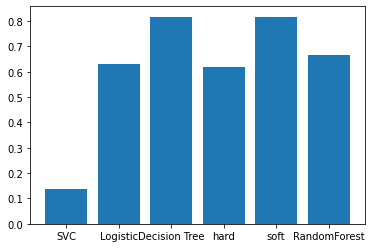

In [ ]:

item = [svc_acc, lr_acc, dt_acc, hard_acc, soft_acc, rf_acc]
x = np.arange(6)
plt.bar(x, height = [
            svc_acc, 
            lr_acc, 
            dt_acc, 
            hard_acc, 
            soft_acc, 
            rf_acc     
])

plt.xticks(x, ['SVC','Logistic', 'Decision Tree', 'hard', 'soft', 'RandomForest'])
print('가장 높은 정확도:', max(item))
print('가장 높은 순위를 가진 인덱스:', item.index(max(item)))

In [ ]:

x = ['lr_acc', 'dt_acc','hard_acc','soft_acc','rf_acc']
y = [ accuracy_score(y_test, lr_acc),
      accuracy_score(y_test, dt_acc),
      accuracy_score(y_test, hard_acc),
      accuracy_score(y_test, soft_acc),
      accuracy_score(y_test, rf_acc)
     ]

import matplotlib.pyplot as plt

plt.bar(x,y)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

TypeError: ignored